## Demo


In [1]:
import cv2
import numpy as np
import scipy.signal
from PIL import Image
from Unet_model import Unet
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread, imshow

Using TensorFlow backend.


In [3]:
B1, B2 = [], []
for i in range(4):
    I = imread('./%d.jpg'%i)
    M = imread('./%d.png'%i)
    IMG = resize(I, (800, 800, 3), mode='constant', preserve_range=True)
    MSK = resize(M, (800, 800, 1), mode='constant', preserve_range=True)
    B1.append(IMG)
    B2.append(MSK)
img_batch = np.array(B1)
msk_batch = np.array(B2)
img_batch.shape, msk_batch.shape

((4, 800, 800, 3), (4, 800, 800, 1))

In [4]:
img_batch = np.asarray(img_batch, dtype=np.float32)/img_batch.max()
img_batch.shape, img_batch.max()

((4, 800, 800, 3), 1.0)

In [7]:
model = Unet(input_shape=(800, 800, 3)) 
model.load_weights('demo.h5')
preds_test = model.predict(img_batch, batch_size = 1, verbose = 1)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

4/4 [==============================] - 49s 12s/step


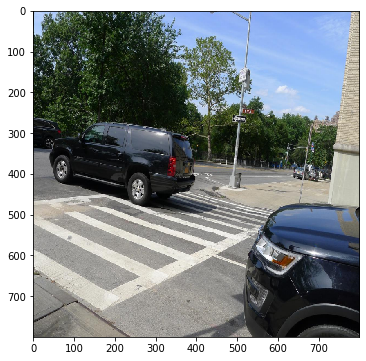

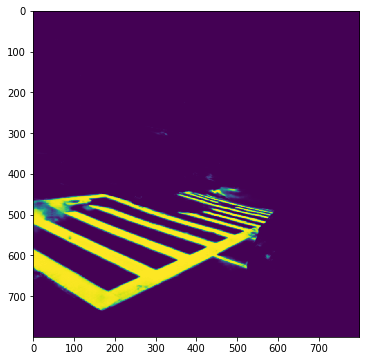

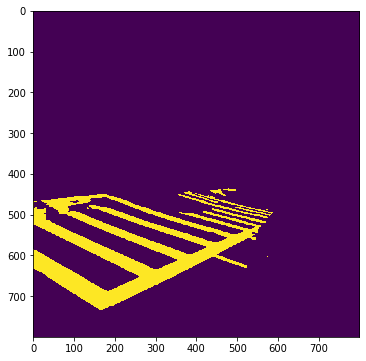

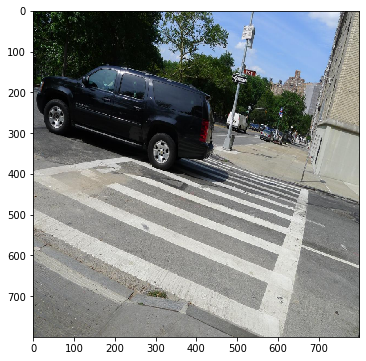

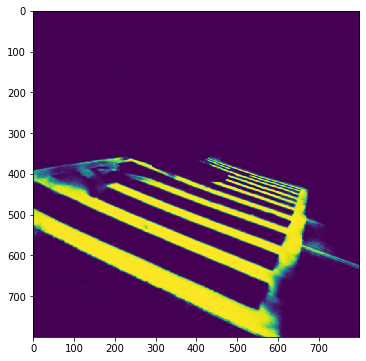

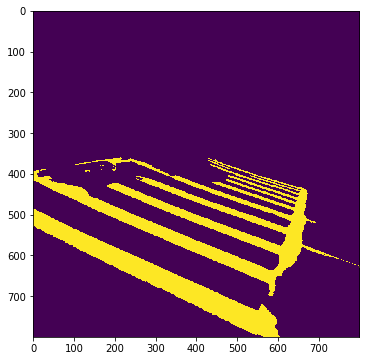

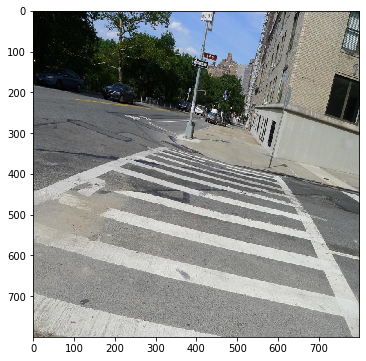

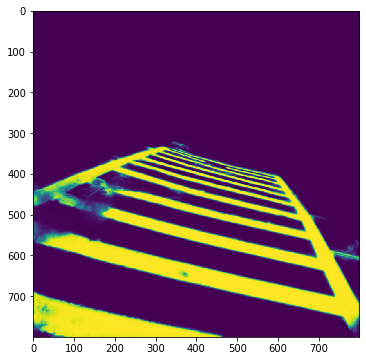

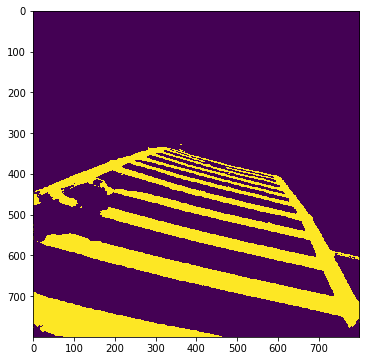

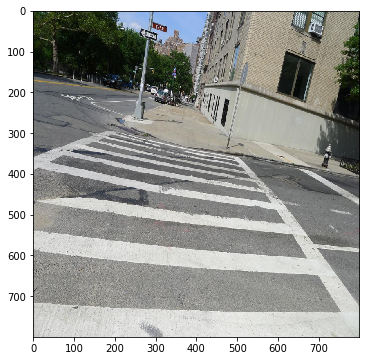

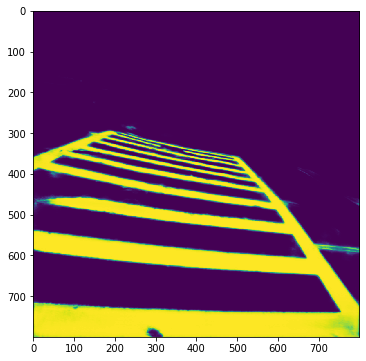

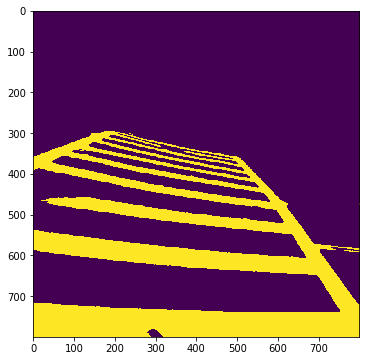

In [8]:
testingset = []
for i in [0, 1, 2, 3]:
    plt.figure(figsize = (6, 6))
    plt.imshow(np.squeeze(img_batch[i]))
    plt.show()
    plt.figure(figsize = (6, 6))
    plt.imshow(np.squeeze(preds_test[i]))
    plt.show()
    plt.figure(figsize = (6, 6))
    plt.imshow(np.squeeze(preds_test_t[i]))
    plt.show()
    testingset.append(np.squeeze(img_batch[i]))